sampled
riltered_lv.2
filtered_lv.3
encoding
normalizing
created next_request column
dropped nan
graph created


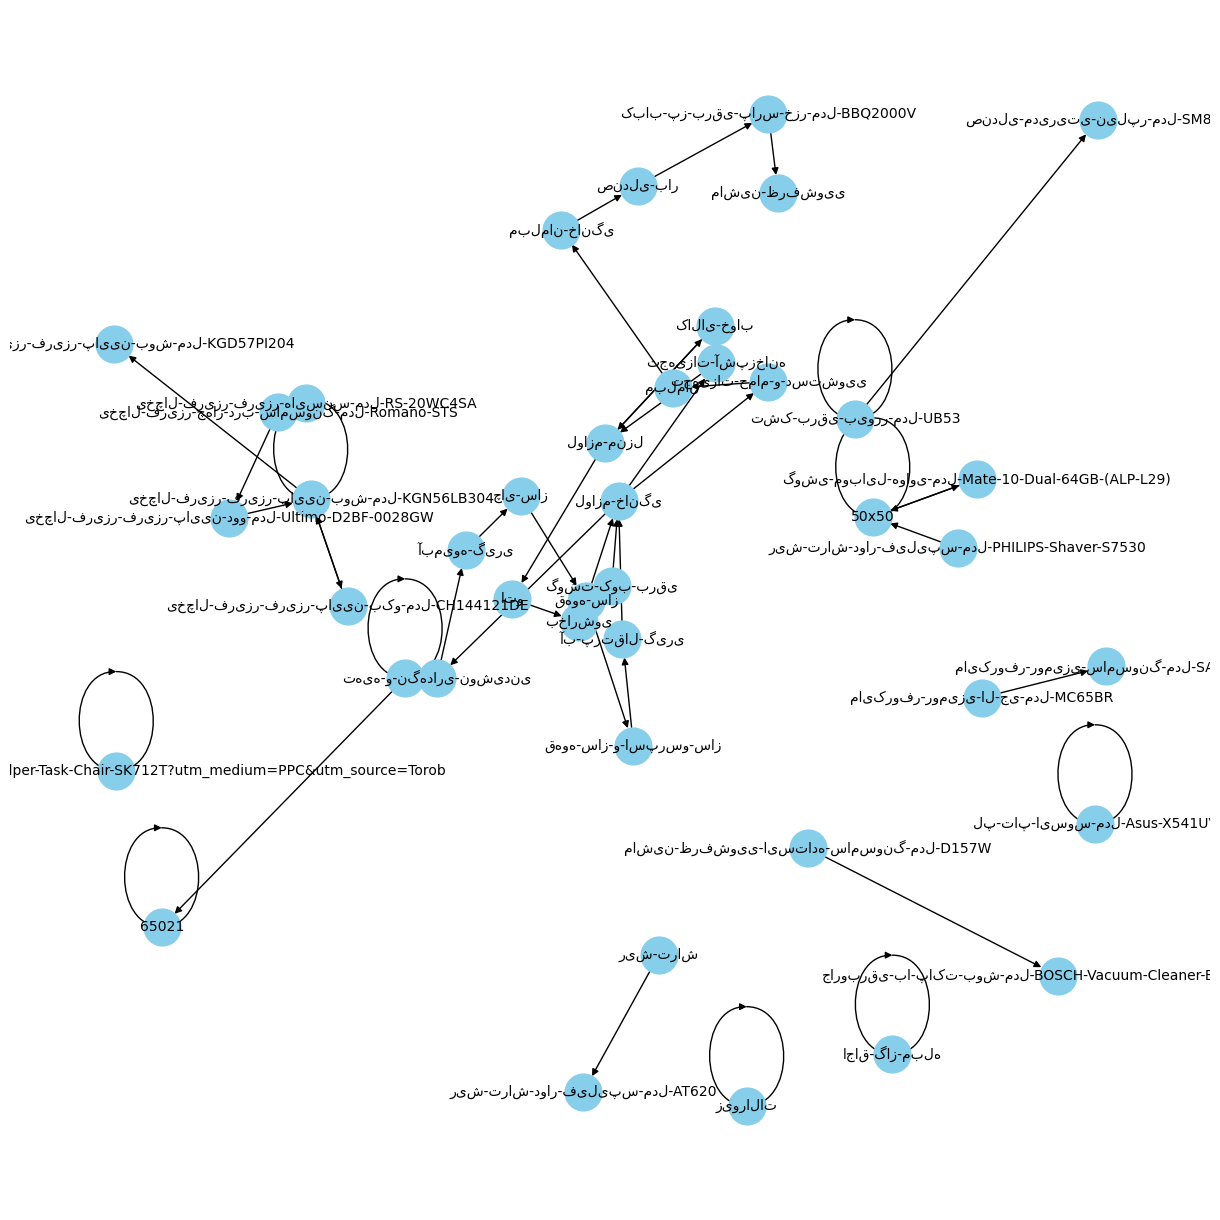

<class 'pandas.core.series.Series'>
گوشت-کوب-برقی ---> ['لوازم-خانگی']
<class 'pandas.core.series.Series'>
یخچال-فریزر-فریزر-هایسنس-مدل-RS-20WC4SA ---> ['یخچال-فریزر-چهار-درب-سامسونگ-مدل-Romano-STS']
<class 'pandas.core.series.Series'>
اجاق-گاز-مبله ---> ['اجاق-گاز-مبله']
<class 'pandas.core.series.Series'>
لوازم-خانگی ---> ['تهیه-و-نگهداری-نوشیدنی', 'تجهیزات-آشپزخانه', 'تجهیزات-حمام-و-دستشویی']
<class 'pandas.core.series.Series'>
یخچال-فریزر-چهار-درب-سامسونگ-مدل-Romano-STS ---> ['یخچال-فریزر-فریزر-پایین-دوو-مدل-Ultimo-D2BF-0028GW']
<class 'pandas.core.series.Series'>
تهیه-و-نگهداری-نوشیدنی ---> ['آبمیوه-گیری']
<class 'pandas.core.series.Series'>
آبمیوه-گیری ---> ['چای-ساز']
<class 'pandas.core.series.Series'>
چای-ساز ---> ['قهوه-ساز']
<class 'pandas.core.series.Series'>
یخچال-فریزر-فریزر-پایین-دوو-مدل-Ultimo-D2BF-0028GW ---> ['یخچال-فریزر-فریزر-پایین-بوش-مدل-KGN56LB304']
<class 'pandas.core.series.Series'>
قهوه-ساز ---> ['قهوه-ساز-و-اسپرسو-ساز']


In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import urllib.parse
def decode_url(encoded_url:str) -> str:
    return urllib.parse.unquote(str(encoded_url))
# CSVファイルを読み込む
df = pd.read_csv('./data/access.csv')
sampled_df=df.head(5000)
print("sampled")
sampled_df = sampled_df[sampled_df['Referer'] != '-']
print("riltered_lv.2")
sampled_df = sampled_df[sampled_df['Request'].str.contains('/browse/|/product/')]
print("filtered_lv.3")
sampled_df['Request']=sampled_df['Request'].apply(decode_url)
print("encoding")
sampled_df['Request'] = sampled_df['Request'].apply(lambda url: url.split('/')[-2].replace(" HTTP",""))
print("normalizing")
# 同一ユーザーの連続したリクエストを取得する
sampled_df['next_request'] = sampled_df.groupby('IP')['Request'].shift(-1)

print("created next_request column")
# NaNを削除する
sampled_df = sampled_df.dropna(subset=['next_request'])
print("dropped nan")
# 有向グラフを作成する
G:nx.DiGraph= nx.from_pandas_edgelist(sampled_df, 'Request', 'next_request', create_using=nx.DiGraph())
print("graph created")
# グラフを描画する
plt.figure(figsize=(12, 12))  # グラフのサイズを12x12インチに設定
pos = nx.spring_layout(G, k=0.15, iterations=20)  # ノード間の距離を広げる
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
plt.show()

def predict_next_products(G, current_product_url:str):
    # 現在の商品URLに対応するノードを見つける
    if current_product_url in G:
        # 次に見そうな商品のノードを取得する
        next_products = list(G.successors(current_product_url))
        return next_products
    else:
        # 現在の商品がグラフにない場合は空のリストを返す
        return []
test_request=sampled_df.head(10)
for colmn,record in test_request.iterrows():
    print(record['Request']+" ---> ",end='')
    print(predict_next_products(G,record['Request']))

In [ ]:
# import cudf
# import cugraph
# import matplotlib.pyplot as plt

# # CSVファイルを読み込む
# gdf = cudf.read_csv('./data/access.csv')

# # 同一ユーザーの連続したリクエストを取得する
# gdf['next_request'] = gdf.groupby('IP')['Request'].shift(-1)

# # NaNを削除する
# gdf = gdf.dropna(subset=['next_request'])

# # cuGraphの有向グラフを作成する
# G = cugraph.DiGraph()
# G.from_cudf_edgelist(gdf, source='Request', destination='next_request')

# # グラフを描画する（注: cugraphは描画機能を提供していないため、NetworkXとMatplotlibを使用）
# # NetworkXグラフオブジェクトに変換する必要がある
# G_nx = G.to_networkx()
# nx.draw(G_nx, with_labels=True)
# plt.show()